In [7]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [8]:
classifier = Sequential()

In [9]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train = ImageDataGenerator(rescale = 1/255., horizontal_flip = True, zoom_range = 0.2)
test = ImageDataGenerator(rescale = 1/255.)

In [13]:
train_set = train.flow_from_directory('dog_cat/dog_cat/training_set/',
                                     target_size = (64, 64),
                                     batch_size = 32, class_mode = 'binary')
test_set = test.flow_from_directory('dog_cat/dog_cat/test_set/',
                                   target_size = (64, 64),
                                   batch_size = 32, class_mode = 'binary')

classifier.fit_generator(train_set, epochs = 30, validation_data = test_set, steps_per_epoch = 20)

classifier.save('model.h5')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
20/20 [==============================] - 261s 13s/step - loss: 0.7076 - accuracy: 0.5234 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/30
20/20 [==============================] - 163s 8s/step - loss: 0.6963 - accuracy: 0.4703 - val_loss: 0.6871 - val_accuracy: 0.6040
Epoch 3/30
20/20 [==============================] - 113s 6s/step - loss: 0.6864 - accuracy: 0.5922 - val_loss: 0.6981 - val_accuracy: 0.5975
Epoch 4/30
20/20 [==============================] - 42s 2s/step - loss: 0.6866 - accuracy: 0.5609 - val_loss: 0.6794 - val_accuracy: 0.5740
Epoch 5/30
20/20 [==============================] - 53s 3s/step - loss: 0.6849 - accuracy: 0.5391 - val_loss: 0.6867 - val_accuracy: 0.5905
Epoch 6/30
20/20 [==============================] - 38s 2s/step - loss: 0.6681 - accuracy: 0.5953 - val_loss: 0.7211 - val_accuracy: 0.5955
Epoch 7/30
20/20 [==============================] - 31s 2s/step - loss: 

In [14]:
classifier.history.history

{'val_loss': [0.6950573921203613,
  0.687090277671814,
  0.6980833411216736,
  0.6794309020042419,
  0.6867444515228271,
  0.7210899591445923,
  0.6020513772964478,
  0.7257999181747437,
  0.6771650314331055,
  0.749691367149353,
  0.5675194263458252,
  0.6546735763549805,
  0.5548455715179443,
  0.6587284803390503,
  0.7568264603614807,
  0.65787672996521,
  0.6152318716049194,
  0.598166823387146,
  0.6190183162689209,
  0.6719311475753784,
  0.610723614692688,
  0.5550863146781921,
  0.6791850328445435,
  0.6332542896270752,
  0.5685031414031982,
  0.6167281866073608,
  0.7462996244430542,
  0.5484575629234314,
  0.57485431432724,
  0.6846081614494324],
 'val_accuracy': [0.5,
  0.6039999723434448,
  0.5975000262260437,
  0.5740000009536743,
  0.590499997138977,
  0.5954999923706055,
  0.6019999980926514,
  0.5559999942779541,
  0.5924999713897705,
  0.6330000162124634,
  0.5805000066757202,
  0.625,
  0.6340000033378601,
  0.6399999856948853,
  0.6554999947547913,
  0.65850001573562

In [15]:
import matplotlib.pyplot as plt

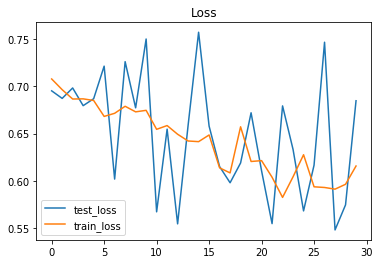

In [16]:
plt.plot(classifier.history.history['val_loss'], Label = 'test_loss')
plt.plot(classifier.history.history['loss'], Label = 'train_loss')
plt.title('Loss')
plt.legend()
plt.show()

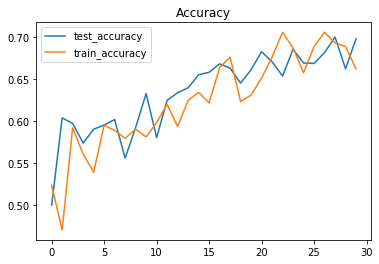

In [17]:
plt.plot(classifier.history.history['val_accuracy'], Label = 'test_accuracy')
plt.plot(classifier.history.history['accuracy'], Label = 'train_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [18]:
import numpy as np
import cv2

In [61]:
img = cv2.imread('dog.jpg')

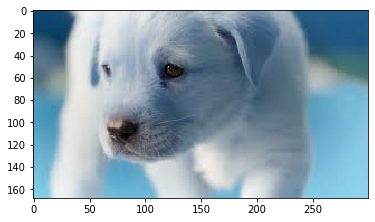

In [62]:
plt.imshow(img)

In [63]:
img.shape

(168, 300, 3)

In [64]:
img = cv2.resize(img, (64, 64))

In [65]:
img = np.reshape(img, (1, 64, 64, 3))

In [66]:
classifier.predict(img)

array([[2.9513894e-10]], dtype=float32)